**Description:**
This project aims to clean, manipulate, and analyze two datasets related to application data. The primary objectives are to prepare the data for analysis by handling missing values, duplicates, and combining datasets, and then to calculate an application rating based on specific criteria. The datasets used include main application data and a supplementary "industries.csv" file that provides industry ratings.

**Key tasks:**

**Data cleaning and preprocessing:**
- Load the datasets.
- Remove duplicate entries based on 'applicant_id'.
- Handle missing values:
    - Fill 'External Rating' with zeros.
    - Fill 'Education level' with "High School".
- Combine the main dataset with "industries.csv" to integrate industry ratings.
- Calculate the Application Rating based on several conditions, ranging from applicant demographics to external ratings.
- Filter out applications with a rating of zero or less.

**Exploratory data analysis (EDA):**
- Analyze the cleaned dataset to understand the distribution and relationships between variables.
- Investigate the characteristics of accepted applications.
- Explore how different factors like age, location, and external ratings influence the application rating.

**Data visualization using Matplotlib and Seaborn:**
- Visualize the distribution of application ratings.
- Plot the correlation between age and application rating.
- Analyze and visualize the impact of various factors on the acceptance of applications.
- Use bar plots, scatter plots, and other visualization techniques to gain insights from the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Loading dataframes:

In [2]:
df = pd.read_csv(r"applications.csv")
df2 = pd.read_csv(r"industries.csv")

Checking on DataFrame structure and containing

In [3]:
df

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"High (bachelor, master)",Ivano-Frankivsk,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Male,Public services / Government,Single,3.0,"High (bachelor, master)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Male,Adtech / Advertising,Single,4.0,"High (bachelor, master)",Kyiv,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Female,Telecom,Single,0.0,"High (bachelor, master)",Lviv,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Female,Automotive,Single,6.0,"High (bachelor, master)",Zhytomyr,5d21f3795b50de8e8f8f8d5f48b754f3
...,...,...,...,...,...,...,...,...,...,...
13310,01.09.2023 11:01,12000.0,25,Male,Medtech / Healthcare,Single,6.0,"High (bachelor, master)",Kharkiv,01908b949a6a1eb44d1ee013ec377f9d
13311,01.09.2023 11:14,10500.0,28,Male,Blockchain,Married,5.0,"High (bachelor, master)",NaN,6599ba629cfcfe8ac42c7d31c13f62de
13312,01.09.2023 11:19,5790.0,25,Male,Blockchain,Married,3.0,"High (bachelor, master)",Dnipro,e57f181bec5b11870a541c43d9b960f7
13313,01.09.2023 11:28,13500.0,31,Male,Mobile,Single,8.0,College,Odesa,a340c62a1226509949ef60df10a7d726


Dropping duplicates if they exist and removing duplicate 'applicant_id' entries (applicants who submitted more than 1 application)

In [4]:
df.drop_duplicates()
df.drop_duplicates(subset='applicant_id', keep='first', inplace=True)

Checking info on DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13278 entries, 0 to 13314
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Applied at       13278 non-null  object 
 1   Amount           13245 non-null  float64
 2   Age              13278 non-null  int64  
 3   Gender           13278 non-null  object 
 4   Industry         13278 non-null  object 
 5   Marital status   13278 non-null  object 
 6   External Rating  13206 non-null  float64
 7   Education level  13245 non-null  object 
 8   Location         11506 non-null  object 
 9   applicant_id     13278 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


We see that 'Applied at' column should have date format, not object.
Changing it data type to DateTime to properly apply Date conditions and filters after during analysis

In [6]:
df['Applied at'] = pd.to_datetime(df['Applied at'])

Filling missing values in the 'External Rating' with zeros:

In [7]:
df['External Rating'].fillna(0, inplace=True)

Filling missing values in the 'Education level' with the text "High School"

In [8]:
df['Education level'].fillna('High School', inplace=True)

Adding data from the "industries.csv" file to this DataFrame, specifically industry ratings

In [9]:
df = df.merge(df2, how='left')

Calculating the Application Rating based on the following conditions:
- The rating should be a number between 0 and 100.
- The rating is the sum of scores across 6 criteria.
- The rating is zero if the 'Amount' value is missing or if 'External Rating' equals zero.
6 criteria of the rating:
- If the applicant's age is between 35 and 55, add 20 points to the rating.
- If the application was not submitted on the weekend, add 20 points to the rating.
- If the applicant is married, add 20 points to the rating.
- If the applicant is located in Kiev or the surrounding region, add 10 points to the rating.
- The 'Score' value from the "industries.csv" table is also added to the application (ranging from 0 to 20 points).
- If 'External Rating' is greater than or equal to 7, add 20 points to the rating.
- If 'External Rating' is less than or equal to 2, subtract 20 points from the rating.

In [10]:
# Conventional way for calculating Rate using multiple if statement
def calculate_rate(row):
    rate = row['Score']
    if np.isnan(row['Amount']) or row['External Rating'] == 0: return 0
    rate += 20 if 35 <= row['Age'] <= 55 else 0
    rate += 20 if row['Applied at'].isoweekday() < 6 else 0
    rate += 20 if row['Marital status'] == 'Married' else 0
    rate += 10 if row['Location'] == 'Київ чи область' else 0
    rate += 20 if row['External Rating'] >= 7 else 0
    rate -= 20 if row['External Rating'] <= 2 else 0
    return rate


# Applying defined function to dataframe and assigning result to the new column 'Rate'
df['Rate'] = df.apply(calculate_rate, axis=1)

In [11]:
# Another way for calculating rate using lambdas and conditions dictionary
conditions = [(lambda row: 35 <= row['Age'] <= 55, 20),
              (lambda row: row['Applied at'].isoweekday() < 6, 20),
              (lambda row: row['Marital status'] == 'Married', 20),
              (lambda row: row['Location'] == 'Kyiv', 10),
              (lambda row: row['External Rating'] >= 7, 20),
              (lambda row: row['External Rating'] <= 2, -20)]


def calculate_rate(row):
    rate = row['Score']
    if np.isnan(row['Amount']) or row['External Rating'] == 0: return 0
    for condition, value in conditions:
        if condition(row): rate += value
    return rate


# Applying defined function to dataframe and assigning result to the new column 'Rate'
df['Rate'] = df.apply(calculate_rate, axis=1)

In the resulting table, keeping only applications with a rating greater than zero. These applications will be considered accepted:

In [12]:
df = df[df['Rate'] != 0]

Grouping the data from the resulting table by the week of application filing and making plot for the average rating of accepted applications for each week.

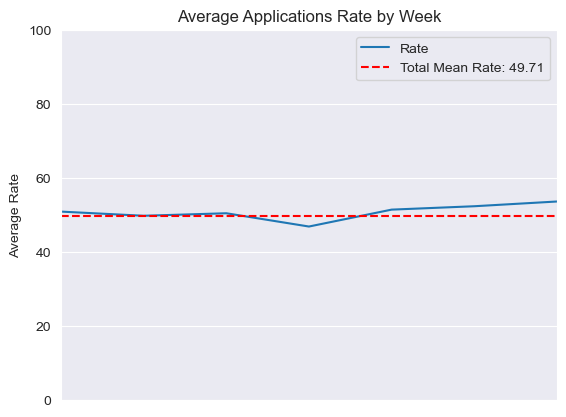

In [13]:
# Grouping the data by the week of application filing
df_weekly_avg_rate = df.groupby(pd.Grouper(freq='W', key='Applied at'))['Rate'].mean()

# Building plot based on created dataframe
mean_rate = df_weekly_avg_rate[1].mean()

df_weekly_avg_rate.plot()
plt.title('Average Applications Rate by Week')
plt.ylabel('Average Rate')
plt.ylim(0, 100)
plt.gca().get_xaxis().set_visible(False)
plt.axhline(mean_rate, color='red', linestyle='--', label=f'Total Mean Rate: {mean_rate:.2f}')
plt.legend()
plt.show()

As we can see, Average Applications Rate almost the same week by week.
Let's see applicants from what locations filed the most number of applications

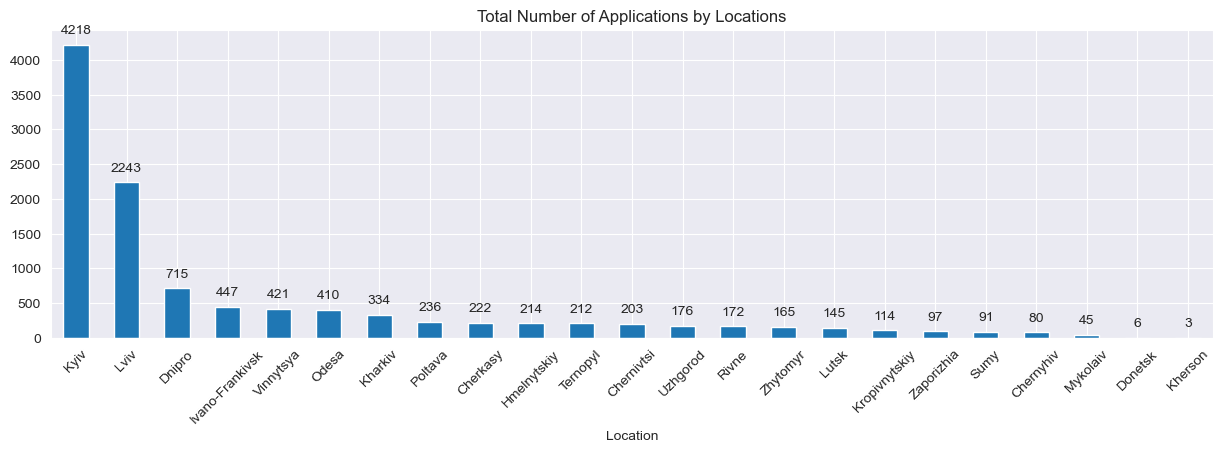

In [14]:
df_by_locations = df.groupby('Location')['applicant_id'].count().sort_values(ascending=False)

mean_value = df_by_locations.mean()

ax = df_by_locations.plot(kind='bar', figsize=(15, 4))
plt.title('Total Number of Applications by Locations')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

We see that most of the applicants is from Kyiv. Let's check in what 3 Industries in Kyiv applicants have the highest mean and median Rate.

In [15]:
df[df['Location'].str.contains('Kyiv', na=False)].groupby('Industry')['Rate'].agg(
    ['mean', 'median']).sort_values(by='mean', ascending=False).head(3)

,mean,median
Industry,,
Agriculture,67.758621,65.0
Cloud Computing,64.603175,70.0
Automotive,63.560000,65.0


Now let's analyze Average Rate by Industries in all Locations

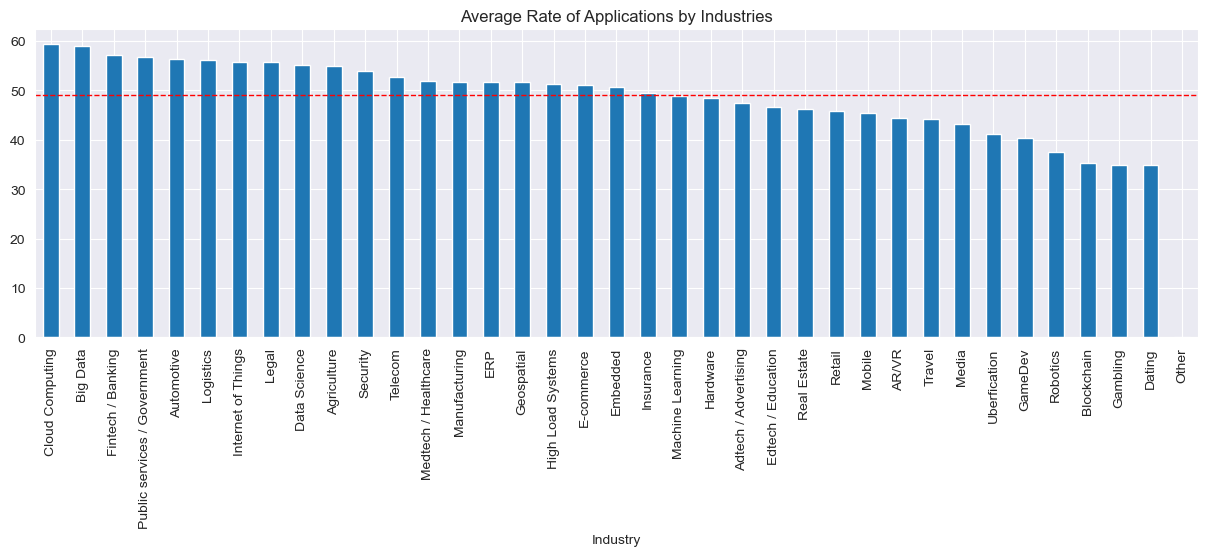

In [16]:
# Group by 'Industry' and calculate mean values
df_by_industry = df.groupby('Industry')['Rate'].mean().sort_values(ascending=False)

# Get mean value for mean line
mean_value = df_by_industry.mean()
ax = df_by_industry.plot(kind='bar', figsize=(15, 4))
plt.title('Average Rate of Applications by Industries')

ax.axhline(mean_value, color='red', linestyle='dashed', linewidth=1)

plt.show()

Now we should compare Average Rate in different education levels

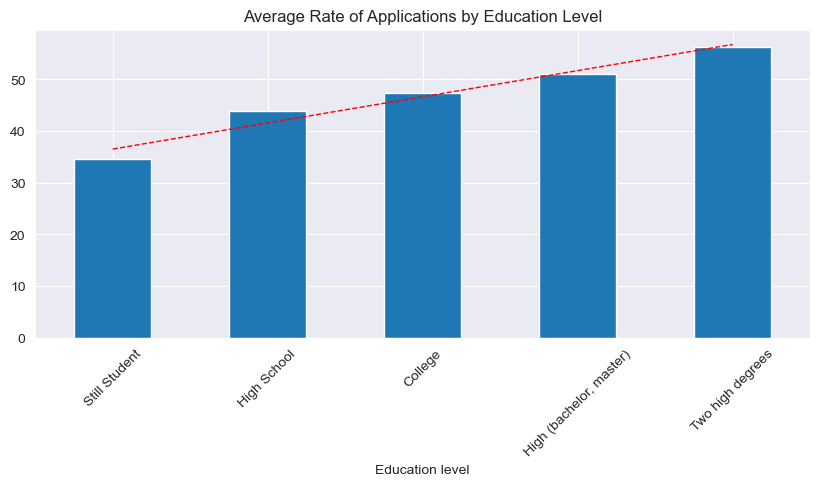

In [17]:
# Group by 'Education level' and alculate mean values
df_by_education = df.groupby('Education level')['Rate'].mean().sort_values(ascending=True)

# Get x and y values for the trend line
x = np.arange(len(df_by_education))
y = df_by_education.values

# Get linear regression fit coefficients
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

ax = df_by_education.plot(kind='bar', figsize=(10, 4))
plt.title('Average Rate of Applications by Education Level')
plt.xticks(rotation=45)

ax.plot(x, p(x), color='red', linestyle='dashed', linewidth=1)

plt.show()

We clearly can see that average rate of applicants rises with the level of education.
Now let's check number of applications by each of the Education Level and Age groups

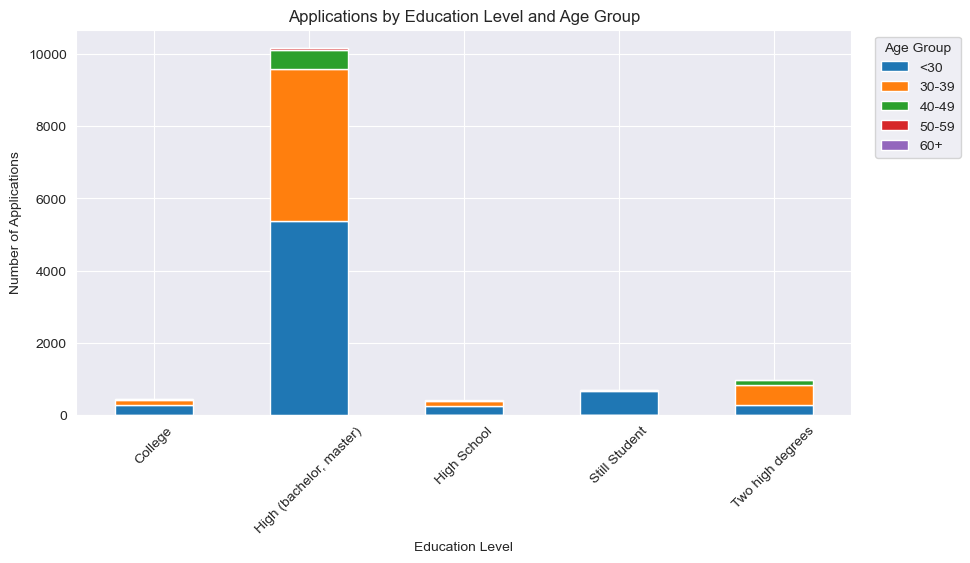

In [18]:
# Create 10-year age bins
age_bins = [0, 29, 39, 49, 59, float('inf')]
age_labels = ['<30', '30-39', '40-49', '50-59', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Group by Education Level and Age Bin, then count the number of applications
df_by_education_age = df.groupby(['Education level', 'Age Group']).size().unstack(fill_value=0)

# Create a stacked bar chart
ax = df_by_education_age.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('Education Level')
plt.ylabel('Number of Applications')
plt.title('Applications by Education Level and Age Group')
plt.legend(title='Age Group', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45)
plt.show()

We see that the most of the applications were submitted by applicants under 30 years old and with High education degree/
Let's check how our values correlated. For this we can plot a heatmap to illustrate it 

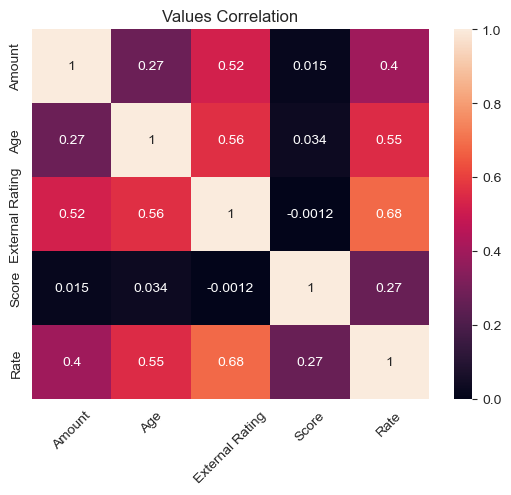

In [19]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Values Correlation')
plt.xticks(rotation=45)
plt.show()

As we can see there are very small correlations between all values. The most values that do correlate is 'External Rating' and our calculated 'Rate' but it is still only 0.68. We can make a scatter plot to see visually how these values are correlated 

C:\Users\iluch\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


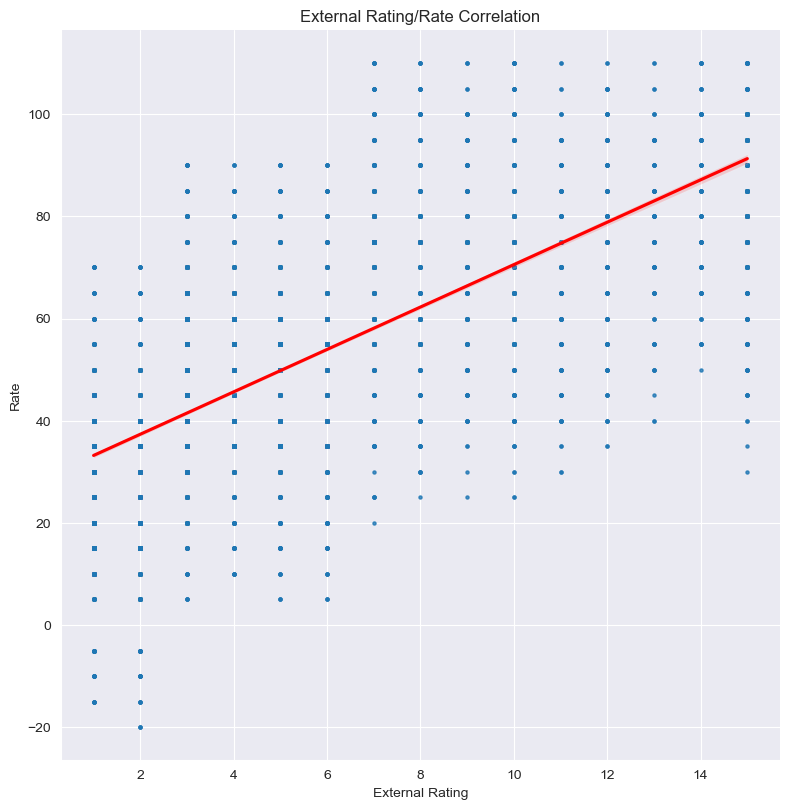

In [20]:
sns.lmplot(data=df, x='External Rating', y='Rate', height=8, scatter_kws={'s': 5}, line_kws={'color': 'red'})
warnings.filterwarnings('ignore', category=UserWarning, message="The figure layout has changed to tight%")
plt.title('External Rating/Rate Correlation')
plt.xlabel('External Rating')
plt.ylabel('Rate')
plt.show()